<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 5
0811033_黃勁瑋_hw05\
2023/10/22


*   Use some data sets with missing data to conduct Exploratory Data Analysis (EDA)
using R, Python, and suitable computer packages.
*   Explain what you find and why you choose these EDA methods.
*   Detect if there are any outliers in this dataset.
*   If there is any outlier in this dataset, how would you deal with it and why? Give your
point of view what you found in this dataset.

*   Discuss possible problems you plan to investigate for future studies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import os
df = pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/used_cars_UK.csv')
#check is the data is read successfully
print(df.head(10))
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0           title  Price  Mileage(miles)  Registration_Year  \
0           0     SKODA Fabia   6900           70189               2016   
1           1  Vauxhall Corsa   1495           88585               2008   
2           2     Hyundai i30    949          137000               2011   
3           3      MINI Hatch   2395           96731               2010   
4           4  Vauxhall Corsa   1000           85000               2013   
5           5   Hyundai Coupe    800          124196               2007   
6           6      Ford Focus    798          140599               2008   
7           7  Vauxhall Corsa   1995           90000               2009   
8           8       Volvo 740    750          225318               1989   
9           9     Peugeot 207   1299           87000               2008   

   Previous Owners Fuel type  Body type Engin

**Check Datatype**

In [ ]:
df.dtypes

Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

**Drop duplicate**

In [ ]:
df = df.drop_duplicates()
df=df.drop(columns=['Unnamed: 0'])
df.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
df.count()

title                3685
Price                3685
Mileage(miles)       3685
Registration_Year    3685
Previous Owners      2276
Fuel type            3685
Body type            3685
Engine               3640
Gearbox              3685
Doors                3660
Seats                3650
Emission Class       3598
Service history       540
dtype: int64

**Check missing and null values**

In [ ]:
print(df.isnull().sum())

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64


**Transfer and normalize datatypes**

In [ ]:
df['Engine'].unique()

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [ ]:
# Convert the values to numbers
df['Engine'] = df['Engine'].str.replace('L', '').astype(float)
df['Engine'].head(5)

0    1.4
1    1.2
2    1.4
3    1.4
4    1.3
Name: Engine, dtype: float64

In [ ]:
df['Service history'].unique()

array([nan, 'Full'], dtype=object)

In [ ]:
# Convert the values to numbers
df['Service history'] = df['Service history'].fillna(0)
df['Service history'] = df['Service history'].replace({ 'Full': 1})
df['Service history'].head(5)

0    0
1    1
2    0
3    1
4    0
Name: Service history, dtype: int64

Extract the car brand form the column "title."

In [ ]:
df[['Brand', 'Model']] = df['title'].str.extract('(\w+)\s(\w+)', expand=True)
df.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,Model
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,0,SKODA,Fabia
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,1,Vauxhall,Corsa
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,0,Hyundai,i30
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,1,MINI,Hatch
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,0,Vauxhall,Corsa


**Remove missing and null values**

In [ ]:
print(df.isnull().sum())
df = df.dropna()
df.count()
print(df.isnull().sum())

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history         0
Brand                   0
Model                   0
dtype: int64
title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
Brand                0
Model                0
dtype: int64


**Data Overview**

In [ ]:
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Service history
count,2239.000000,2.239000e+03,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5984.423403,8.293097e+04,2012.308620,2.805270,1.603082,4.410004,4.930773,0.180438
std,4761.228187,4.240144e+04,4.710367,1.540791,0.466897,0.937172,0.591974,0.384638
min,400.000000,6.000000e+00,1993.000000,1.000000,0.800000,2.000000,2.000000,0.000000
25%,2450.000000,5.839800e+04,2009.000000,2.000000,1.300000,4.000000,5.000000,0.000000
50%,4250.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,0.000000
75%,8492.000000,1.050000e+05,2016.000000,4.000000,2.000000,5.000000,5.000000,0.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,1.000000


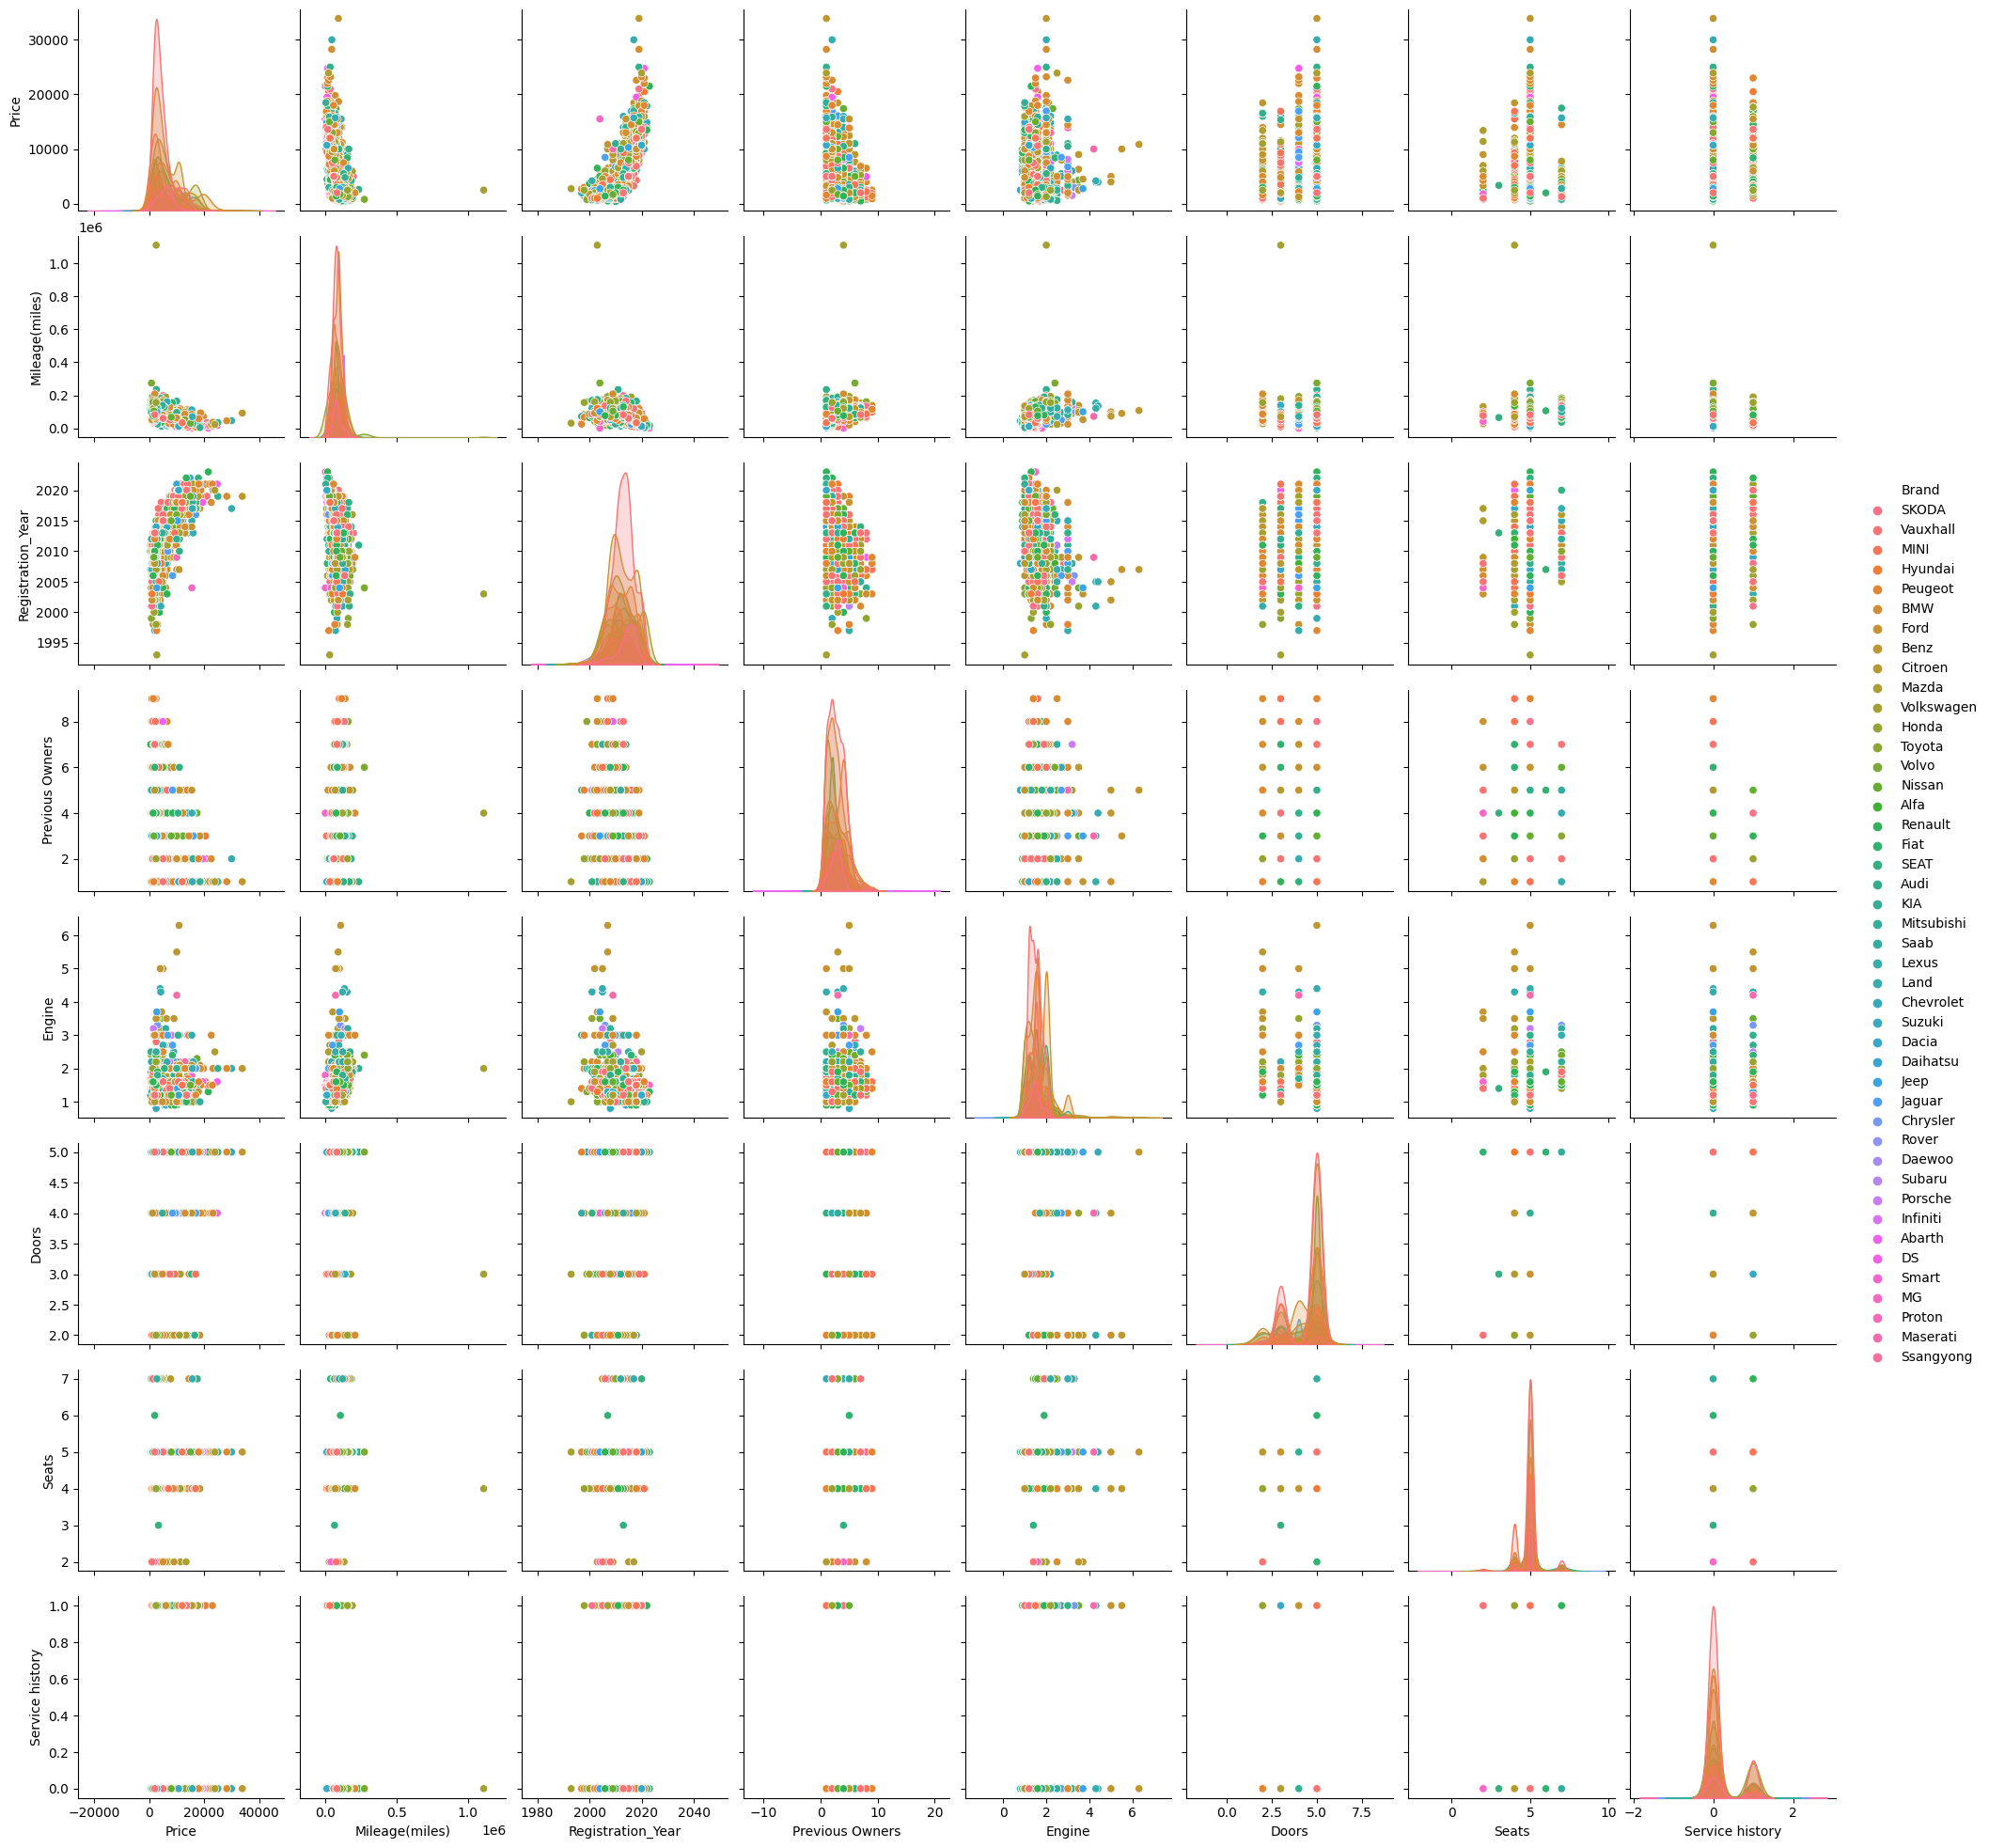

In [ ]:
sns.pairplot(df,hue='Brand')
plt.show()

<Axes: >

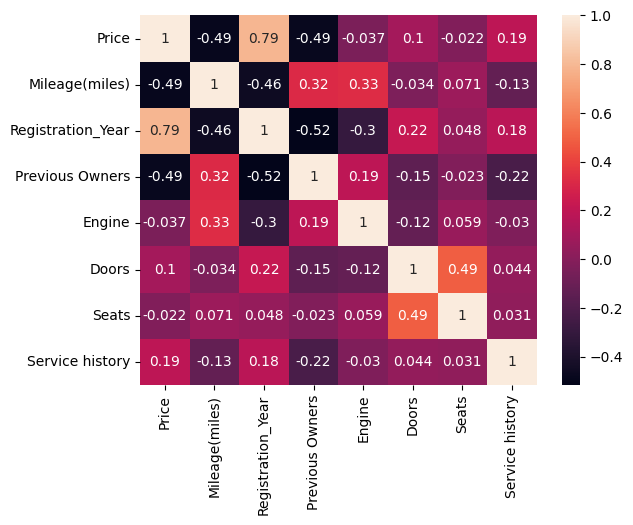

In [ ]:
#check correlation
sns.heatmap(df[['Price','Mileage(miles)','Registration_Year','Previous Owners','Engine','Doors','Seats','Service history']].corr(),annot=True)

From the correlation and the pair plot we see that feature "Doors" and "Seats" are likely to be irrelevant to the price. Moreover, feature "Mileage," "Registration," and "Previous Owners" are strongly correlatted to the price.  

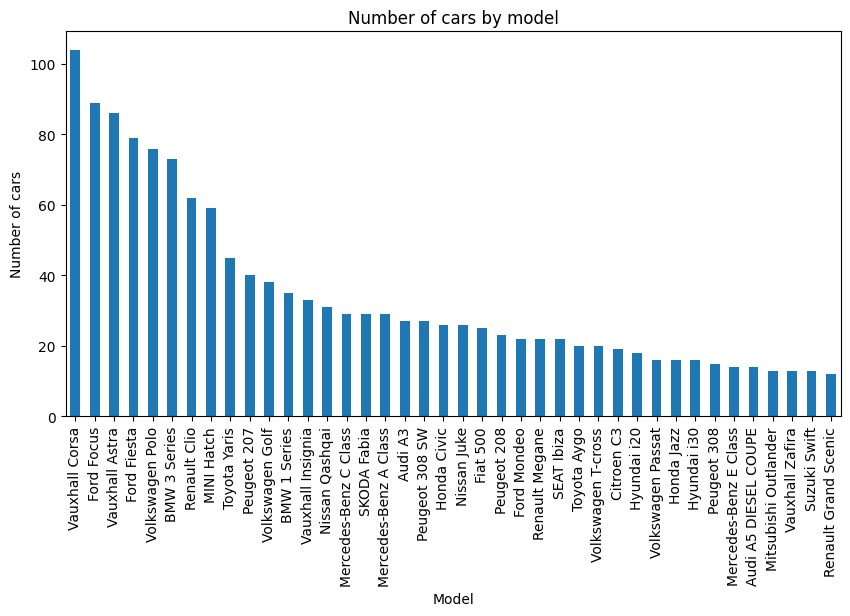

In [ ]:
df.title.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by model")
plt.ylabel('Number of cars')
plt.xlabel('Model');

"Number of cars by model" shows what kind of car models are contained in this dataset.

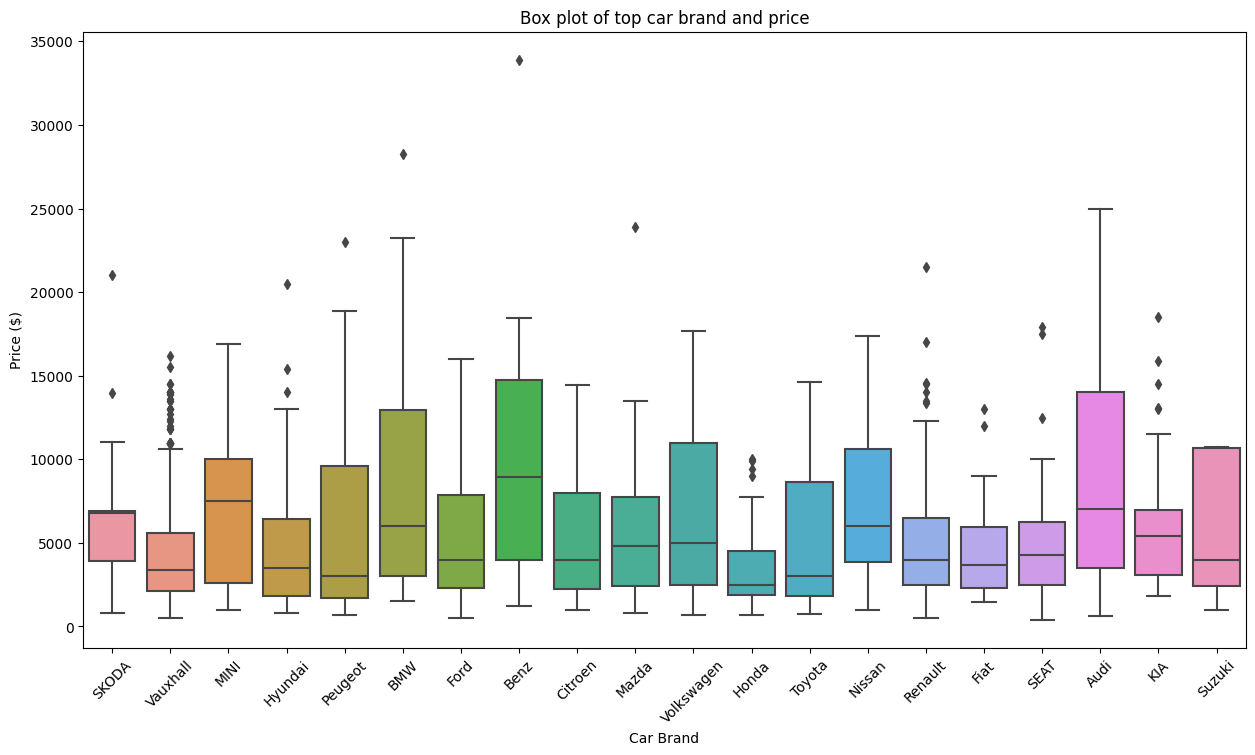

In [ ]:
# Select the top car makes by frequency
make_col = 'Brand'
top_makes = df[make_col].value_counts().head(20).index.tolist()


# Select the top 5 car makes by frequency
top_makes = df['Brand'].value_counts().head(20).index.tolist()

# Create a new DataFrame that only includes the top makes
top_make_data = df[df[make_col].isin(top_makes)]

# Create the box plot with the top makes
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=make_col, y='Price', data=top_make_data, ax=ax)
ax.set_title('Box plot of top car brand and price')
ax.set_xlabel('Car Brand')
ax.set_ylabel('Price ($)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

From the box plot of top car brand and price it seams that cars manufactured by some luxury brands such as BMW, Benz and Audi tens to have higher price and their price data are skew to the higher price end.

From the correlation and the pair plot it seam that Registration_Year vs Price plot can well represent the data, so we use this plot to check if any features may cause Simpson's paradox and how would they effect the result.

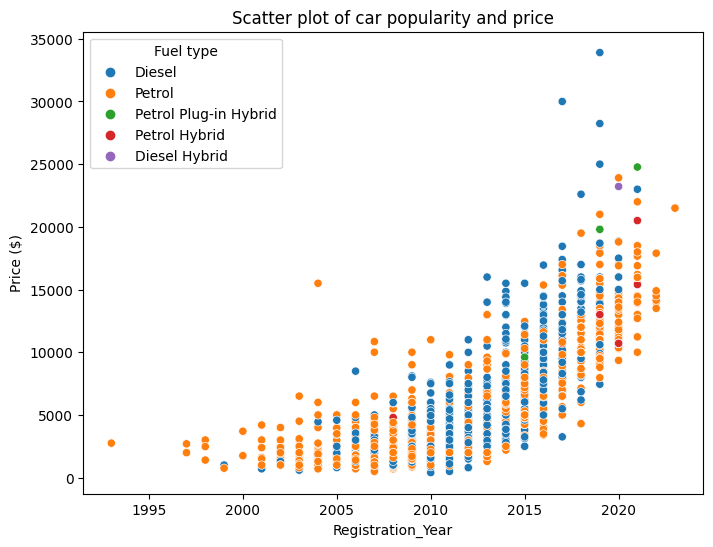

In [ ]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df,x='Registration_Year', y='Price',hue='Fuel type')
ax.set_title("Scatter plot of car popularity and price")
ax.set_xlabel("Registration_Year")
ax.set_ylabel("Price ($)")

# Show the plot
plt.show()

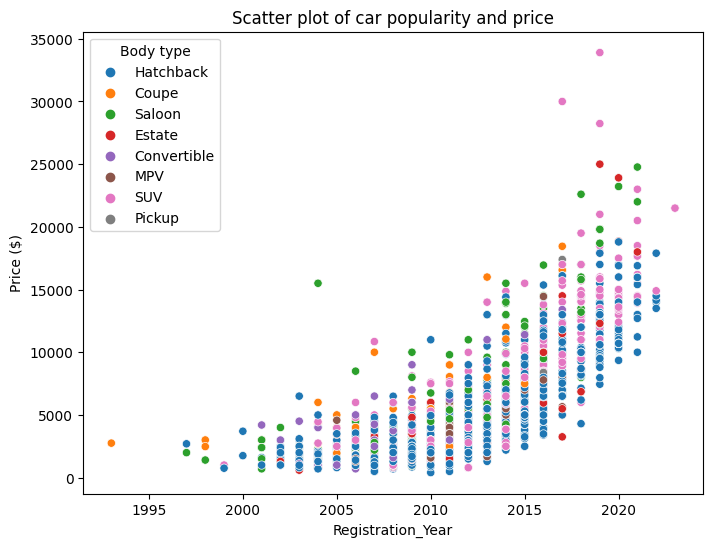

In [ ]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df,x='Registration_Year', y='Price',hue='Body type')
ax.set_title("Scatter plot of car popularity and price")
ax.set_xlabel("Registration_Year")
ax.set_ylabel("Price ($)")

# Show the plot
plt.show()

Body type and fuel type may effect the car price which is shown in the plots above but it is hard to tell the effectiveness from the pictures.

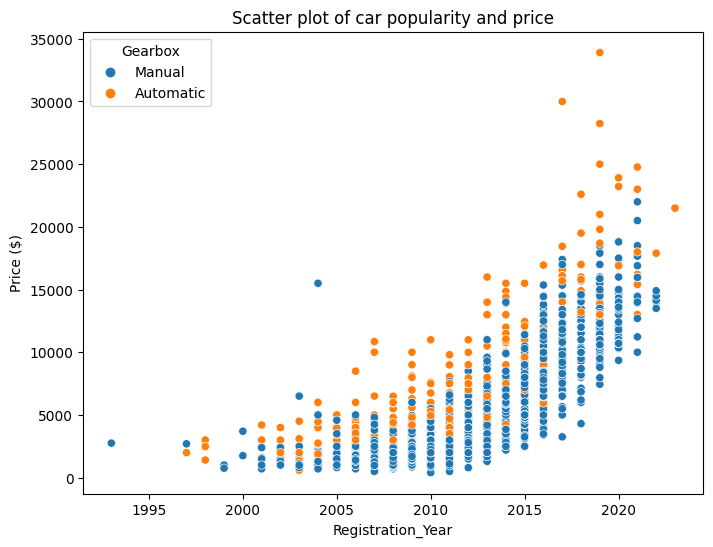

In [ ]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df,x='Registration_Year', y='Price',hue='Gearbox')
ax.set_title("Scatter plot of car popularity and price")
ax.set_xlabel("Registration_Year")
ax.set_ylabel("Price ($)")

# Show the plot
plt.show()

It is clear that automatic cars have higher price.

**Drop irrelevant columns**

In [ ]:
df = df.drop(['Doors', 'Seats'], axis=1)
df.head(5)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Emission Class,Service history,Brand,Model
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,Euro 6,0,SKODA,Fabia
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,Euro 4,1,Vauxhall,Corsa
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,Euro 4,1,MINI,Hatch
5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0,Manual,Euro 4,0,Hyundai,Coupe
9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6,Manual,Euro 4,0,Peugeot,207


**Detect Outliers**

<Axes: xlabel='Price'>

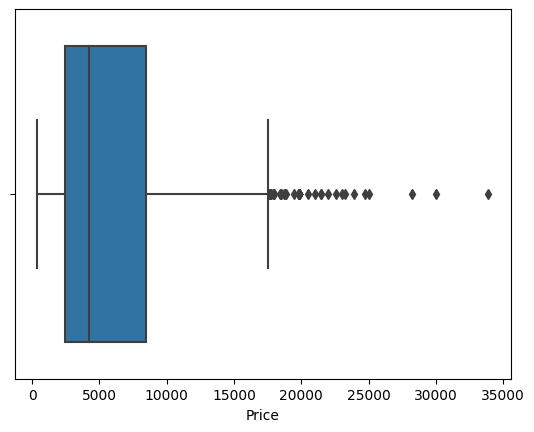

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Mileage(miles)'>

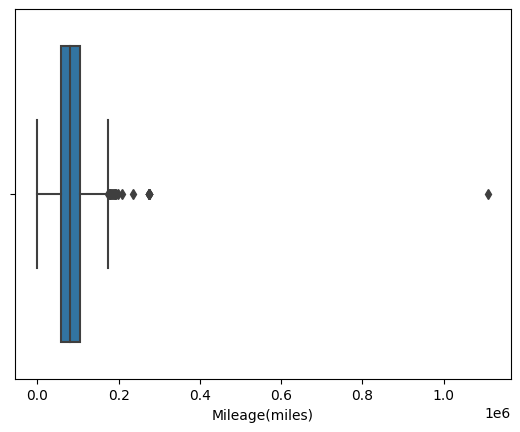

In [ ]:
sns.boxplot(x=df['Mileage(miles)'])

<Axes: xlabel='Registration_Year'>

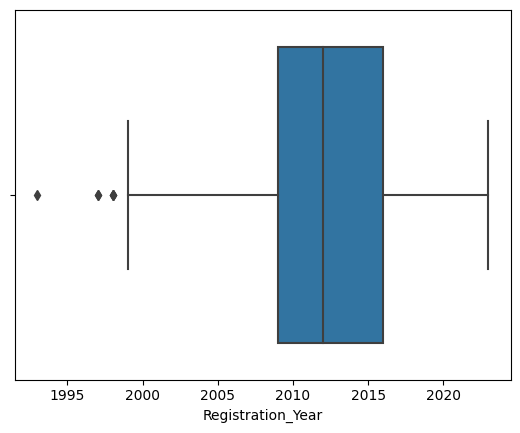

In [ ]:
sns.boxplot(x=df['Registration_Year'])

<Axes: xlabel='Previous Owners'>

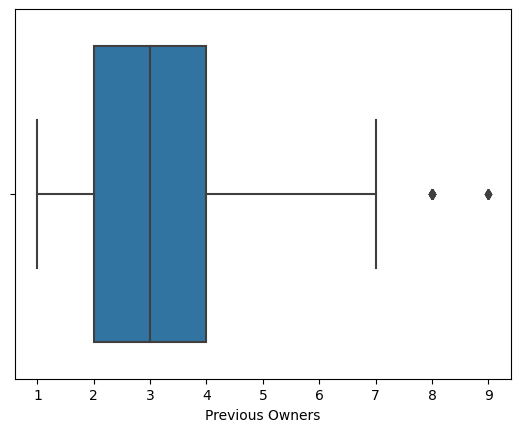

In [ ]:
sns.boxplot(x=df['Previous Owners'])

<Axes: xlabel='Engine'>

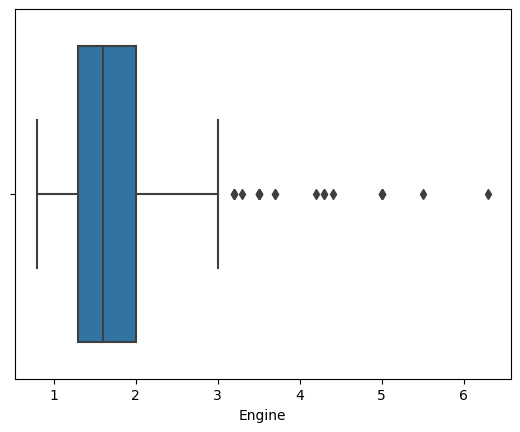

In [ ]:
sns.boxplot(x=df['Engine'])

Cars that have mileage that larger then 500000 miles, registration year before 1998 and have 8 or more previous owners are defined as outliers. Since they are minor compare to the entire dataset we remove them.

In [ ]:
# Define outlier criteria
mileage_threshold = 500000
registration_year_threshold = 1998
previous_owners_threshold = 8

# Filter the DataFrame to remove outliers
filtered_df = df[(df['Mileage(miles)'] <= mileage_threshold) | (df['Registration_Year'] < registration_year_threshold) | (df['Previous Owners'] >= previous_owners_threshold)]
filtered_dfprint(df.head(10))

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/modified_used_cars_UK.csv')

The data is now explored and cleaned. The data filtered_df can now be used to train models such as price prediction model for used cars based on the contained features in the datasey.